<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

# *De Novo* Parametric Backbone Design

Keywords: Parametric, Bundle, BundleGridSampler, MakeBundle

## Overview

In this workshop, we will give examples for how to do Parametric Protein Design of alpha-helical bundles.  The BundleGridSampler and MakeBundle movers are available through PyRosetta.

As an alternative to this interface, you can connect to CCCP (https://grigoryanlab.org/cccp/) to generate your helical backbones. Once you download the PDBs from the CCCP website, you can drop them into the left panel to upload them and use them here for design.

Check-out this blog for sum fun ideas: Weitzner, Brian. "Parametric disasters" Published September 03, 2018. https://rosettacommons.blogspot.com/2020/05/parametric-disasters.html

This is some cool stuff. Enjoy. :)

Please refer to the docs for more info.

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/Movers-RosettaScripts

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/movers_pages/MakeBundleMover

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/movers_pages/BundleGridSamplerMover

In [1]:
import pyrosetta; pyrosetta.init()


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python310.linux 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python310.linux r384 2024.24+release.ca096da ca096dac4f43ee5

In [25]:
pyrosetta.init("-mute all -out:path:pdb '/data/brussel/vo/000/bvo00014/practicals_protein_design/parametric_design/' ")

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python310.linux 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python310.linux r384 2024.24+release.ca096da ca096dac4f43ee5

In [20]:
#Set here the current working directory
current_dir="/data/brussel/vo/000/bvo00014/practicals_protein_design/parametric_design/"

## Overview

Parametric sampling means changing specific angles of groups of bundles (coiled-coils) in order to sample different conformations.  The equations that are used for Parametric sampling were originally described by Crick and are called Crick equations. 

These equations were reintroduced to the scientific community through William F Degrado's seminal paper, "Probing designability via a generalized model of helical bundle geometry"

Since the puplication of that paper, researchers have used this method to create bundles of all sorts.  Fibers, membrane proteins, and even working antiporters!  


## Main References

- Crick FH. 

   **"The Fourier Transform of a Coiled Coil."** 
   
   *Acta Cryst.* 1953; 6: 685
   

- Grigoryan G, DeGrado WF.
   
   **"Probing Designability via a Generalized Model of Helical Bundle Geometry."** 
   
   *J. Mol. Biol.* 2011; 405(4): 1079-1100
   
   
- Huang, Po-Ssu et al. 

   **“High thermodynamic stability of parametrically designed helical bundles.”** 
   
   *Science*. 2014; 346(6208): 481-485. 
   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4612401/
   

- Dang B, Wu H, Mulligan VK, Mravic M, Wu Y, Lemmin T, Ford A, Silva DA, Baker D, DeGrado WF.

   **"De novo design of covalently constrained mesosize protein scaffolds with unique tertiary structures."**
   
   *Proc Natl Acad Sci U S A*. 2017 Oct 10;114(41):10852-10857.
   https://www.ncbi.nlm.nih.gov/pubmed/28973862
   
   
- Lu P,Min D, DiMaio F, Wei KY, Vahey MD, Boyken SE, Mulligan, et al.

   **"Accurate computational design of multipass transmembrane proteins."**
   
   *Science*. 2018 Mar 2;359(6379):1042-1046. 
   https://www.ncbi.nlm.nih.gov/pubmed/29496880
   
   
- Chen Z, Boyken SE, Jia M, Busch F, Flores-Solis D, Mulligan, et al.

   **"Programmable design of orthogonal protein heterodimers."**
   
   *Nature*. 2019 Jan;565(7737):106-111. 
   https://www.ncbi.nlm.nih.gov/pubmed/30568301
   
   
- Langan RA Boyken SE, Ng AH, Samson JA, Dods G, Mulligan, et al.

  **"De novo design of bioactive protein switches."**
  
  *Nature*. 2019 Aug;572(7768):205-210.
  https://www.ncbi.nlm.nih.gov/pubmed/31341284
  
  
## Parameter tips 

- Most bundles would have r0 from 3 to 10 A (depending on the helix count).
- Omega0 should range from about -2.5 degrees to 2.5 degrees.
- Delta_omega1 can be anywhere from 0 to 360.  (It's just the roll of the helix about its own axis).
- Delta_z0, delta_z1 or delta_t can be anything (you're just sliding the helix up and down).  Typically, you'd just sample around a few Angstroms, though.
- r1, omega1, etc. are all minor helix parameters that are observed in average alpha-helices.  We don't normally vary them.

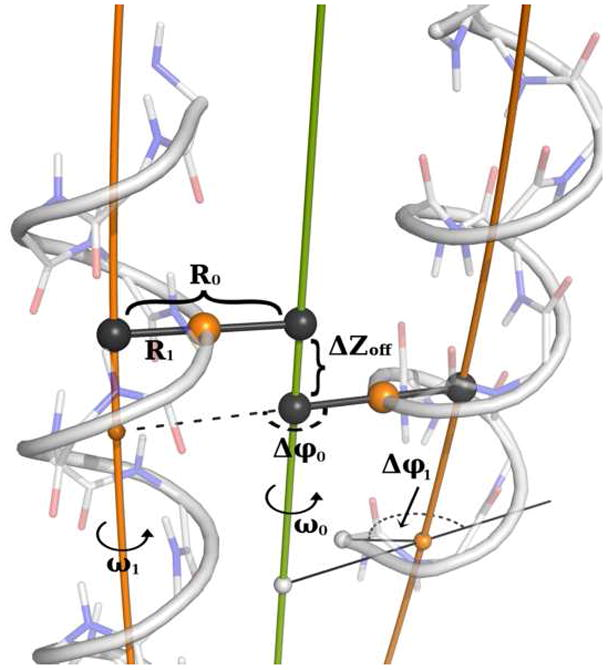

  
## Creating multiple Helices
The Helix lines tell the sampler to create a helix and how to do so. We set them at 90 degree rotations through this line, but we could add additional parameters as well.  These parameters are VERY WELL documented on the link above, so make sure to use that:

**delta_omega0**: Rotation of a helix about the z-axis, stored in radians.

### Changing r0:

Here, we will sample on the r0 axis.  

**r0**: Major helix radius, in Angstroms.

In [29]:
import math

for i in range(1, 11, 1):

    pose = pyrosetta.rosetta.core.pose.Pose()

    sampler_string = f'''
    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="{i}"
                     omega0="0.05"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>'''
    print(sampler_string)
    pyrosetta.rosetta.protocols.rosetta_scripts.XmlObjects.create_from_string(sampler_string).get_mover("bgs1").apply(pose)
    pose.dump_pdb(current_dir+'outputs/r0_'+str(i)+'.pdb')


    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="1"
                     omega0="0.05"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>

    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="2"
                     omega0="0.05"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>

    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref201

Ok, so now lets have a look at this - it is quite fast as we are simply manipulating the backbone and doing doing any sequence design (yet).  Which axis changed?  Lets try changing some other values!


## Changing omega0

Note the use of Python3's awesome f-strings here, and the speed.  Because we need to parse the xml object and create a new mover, pose, etc. each time, this is much slower than the sampler - but it does allow us a bit more flexibility to use python the way it was intended.  

**omega0**: Major helix twist per residue, stored in radians.

In [27]:
for i in range(0, 32, 2):

    i_rad = math.radians(i)
    pose = pyrosetta.rosetta.core.pose.Pose()

    sampler_string = f'''
    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="5"
                     omega0="{i_rad}"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>'''
    print(sampler_string)
    pyrosetta.rosetta.protocols.rosetta_scripts.XmlObjects.create_from_string(sampler_string).get_mover("bgs1").apply(pose)
    pose.dump_pdb(current_dir+'outputs/omega0_'+str(i)+'.pdb')


    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="5"
                     omega0="0.0"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>

    <SCOREFXNS>
        <ScoreFunction name="sfxn1" weights="ref2015"/>
    </SCOREFXNS>
    <MOVERS>
        <MakeBundle name="bgs1"
                     helix_length="20"
                     r0="5"
                     omega0="0.03490658503988659"
                     delta_omega0="0"
                     delta_omega1="0"
                     delta_t="0">
        <Helix/>
        <Helix delta_omega0="3.14" r0_copies_helix="1"/>
        
        </MakeBundle>
    </MOVERS>

    <SCOREFXNS>
        <ScoreFunction name="sfxn1" w

What is the maximum value of omega0?  Which PDBs are empty??

## Conclusion

This should give you an overview of how to use the MakeBundle and BundleGridSampler within PyRosetta.  Everything else is simply parameters.  Read up and you'll be ready to start designing your own helical bundles. 